<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/brownian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brownian Bridge**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* A Brownian bridge is a continuous Gaussian process with X<sub>0</sub> = X<sub>1</sub> = 0, and with mean and covariance functions given in (c) and (d), respectively.

In financial engineering it is used f 

But in fact, we will see several ways of constructing a Brownian bridge from a standard Brownian motion.

https://www.randomservices.org/random/brown/Bridge.html

**Brownian Bridge benefits in two ways in financial engineering:**

* BB could reduce the simulation paths, this reduces computation effort, especially when the underlying factors are a lot (say 20-30). I noticed that Papageorgiou1 has a paper "The Brownian Bridge Does Not Offer a Consistent Advantage in Quasi-Monte Carlo Integration" (2002). 
* BB could reduce the computation effort on path-dependent derivatives. For example, during pricing of a barrier option, a path could be simulated with monthly scenarios of the factors; then BB could be used to estimate the probability of the path "knock-out" of the barrier.

**Applications: Path Simulation for Stock Shares**

* The simple Monte Carlo method with Euler method supplemented by the Brownian bridge correction for the possibility of falling below or exceeding the barriers between discretization times. 

* By merely discreetly viewing (simulating) the (log) share price, those paths can also lead to a positive final payment in which the share price between the selected times k delta t has exceeded the lower barrier or exceeded the upper barrier without this is noticed in the discretized model. 

* To calculate the probability of such an unnoticed barrier violation, Brownian Bridge is used (with the help of the independence and stationarity of its growth).

* With the help of the statements about the Brown Bridge, one can formally. Specify the Monte Carlo algorithm that can be used to evaluate double barrier options without having to discretize the price path.

**Application: Bond Prices**

* Computation of bond prices in a structural default model with jumps with an unbiased Monte-Carlo simulation. 

* The algorithm requires the evaluation of integrals with the density of the first-passage time of a Brownian bridge as the integrand. (Metwally and Atiya (2002) suggest an approximation of these integrals.)

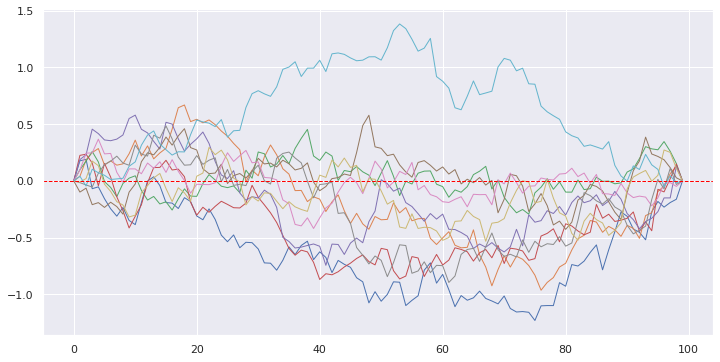

In [0]:
import six

seed = 0
N = 100
M = 10

np.random.seed(seed)

def sample_path_batch(M, N):
    dt = 1.0 / (N -1)                                                          #  changed from 1.0 / N
    dt_sqrt = np.sqrt(dt)
    B = np.empty((M, N), dtype=np.float32)
    B[:, 0] = 0
    for n in six.moves.range(N - 2):                                           # changed from "for n in six.moves.range(N - 1)"
         t = n * dt
         xi = np.random.randn(M) * dt_sqrt
         B[:, n + 1] = B[:, n] * (1 - dt / (1 - t)) + xi
    B[:, -1] = 0                                                               # added: set the last B to Zero
    return B

sns.set(rc={'figure.figsize':(12, 6), "lines.linewidth": 1.0})
B = sample_path_batch(M, N)
plt.plot(B.T)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0)
plt.show()